# Import Libraries

In [1]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window
%matplotlib inline

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
# from sklearn.linear_model import LogisticRegression, RidgeClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD

# Neural Networks
# from sklearn.neural_network import MLPClassifier
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers


#Evaluation
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import roc_auc_score, accuracy_score

#tuning
# import keras_tuner as kt
# import optuna

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


# Data

In [2]:
# Reading Data File
competition_train = pd.read_csv('../input/playground-series-s4e2/train.csv')
competition_test = pd.read_csv('../input/playground-series-s4e2/test.csv')
sample_submission = pd.read_csv('../input/playground-series-s4e2/sample_submission.csv')

print('The dimension of the train dataset is:', competition_train.shape)
print('The dimension of the test dataset is:', competition_test.shape)

The dimension of the train dataset is: (20758, 18)
The dimension of the test dataset is: (13840, 17)


In [3]:
competition_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
competition_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
competition_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

## About Dataset
Description of dataset is as below. Credit to [KHEMKARAN SEVTA](https://www.kaggle.com/competitions/playground-series-s4e2/discussion/472605).
> | Column | Full Form | Description | 
> |---|---|---|
> | 'id'| id | Unique for each person(row)|
> |'Gender'| Gender| person's Gender|
> | 'Age' | Age| Dtype is float. Age is between 14 years to 61 years |
> |'Height'| Height | Height is in meter it's between 1.45m to 1.98m|
> | 'Weight' | Weight| Weight is between 39 to 165. I think it's in Kgs.|
> |'family_history_with_overweight'| family history <br> with overweight| yes or no question|
> | 'FAVC'| Frequent consumption <br> of high calorie food| it's yes or no question. i think question they asked is <br>do you consume high calorie food|
> |'FCVC'|  Frequency of <br>consumption of vegetables| FCVC is between 1 & 3 . in our data it's given as float|
> |'NCP'| Number of main meals| dtype is float, NCP is between 1 & 4. I think it should be 1,2,3,4 <br>but our data is synthetic so it's taking float values|
> |'CAEC'| Consumption of <br>food between meals| takes 4 values `Sometimes`, `Frequently`, `no` & `Always` <br>|
> | 'SMOKE'| Smoke | yes or no question. i think the question is "Do you smoke?" |
> |'CH2O'| Consumption of <br>water daily| CH2O takes values between 1 & 3. <br>again it's given as float may be because of synthetic data. it's values should be 1,2 or 3|
> |'SCC'|  Calories consumption <br>monitoring| yes or no question|
> |'FAF'| Physical activity <br>frequency| FAF is between 0 to 3, 0 means no physical activity<br> and 3 means high workout. and again, in our data it's given as float|
> |'TUE'| Time using <br>technology devices| TUE is between 0 to 2. I think question will be<br> "How long you have been using technology devices to track your health. in our data it's given as float |
> |'CALC'| Consumption of alcohol | Takes 3 values: `Sometimes`, `no`, `Frequently`|
> | 'MTRANS' | Transportation used| MTRANS takes 5 values `Public_Transportation, `Automobile`, `Walking`, `Motorbike`, & 'Bike'|
> |'NObeyesdad'| TARGET | This is our target, takes 7 values, and in this comp. we have to give <br>the class name (Not the Probability, which is the case in most comp.)
> 


In [6]:
print(competition_train.select_dtypes(include='object').nunique())
print(competition_test.select_dtypes(include='object').nunique())

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              3
MTRANS                            5
NObeyesdad                        7
dtype: int64
Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              4
MTRANS                            5
dtype: int64


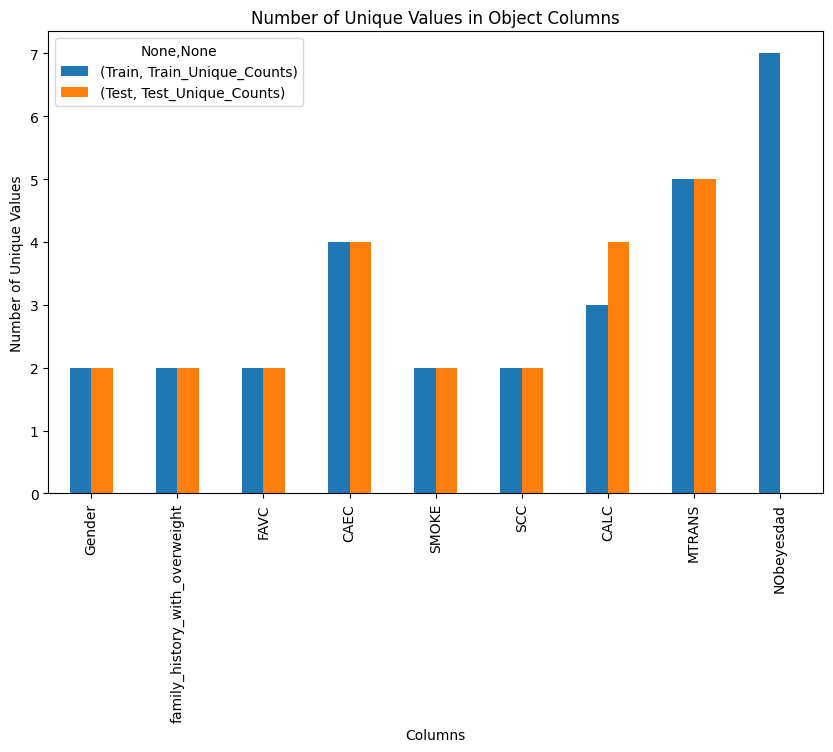

In [7]:
# it can be seen that CALC has different number of unique values in train and test dataset

# lets visually display it
# Display the number of unique values in each column with object data type in the training dataset
train_object_unique_counts = competition_train.select_dtypes(include='object').nunique()

# Display the number of unique values in each column with object data type in the test dataset
test_object_unique_counts = competition_test.select_dtypes(include='object').nunique()

# Create DataFrames from the counts
train_object_unique_df = pd.DataFrame(train_object_unique_counts, columns=['Train_Unique_Counts'])
test_object_unique_df = pd.DataFrame(test_object_unique_counts, columns=['Test_Unique_Counts'])

# Concatenate the DataFrames for display
result_df = pd.concat([train_object_unique_df, test_object_unique_df], axis=1, keys=['Train', 'Test'])

# Display the result
# Plot the bar graph
result_df.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Unique Values in Object Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.show()

In [8]:
pd.concat([pd.DataFrame(competition_train.CALC.value_counts()), pd.DataFrame(competition_test.CALC.value_counts())], axis=1, keys=['Train', 'Test'])

,Train,Test
,count,count
CALC,,
Sometimes,15066.0,9979
no,5163.0,3513
Frequently,529.0,346
Always,NaN,2


In [9]:
# This should be taken care off while modeling

In [10]:
# Lets see null values
pd.concat([pd.DataFrame(competition_train.isnull().sum()), pd.DataFrame(competition_test.isnull().sum())], axis=1, keys=['Train', 'Test'])

,Train,Test
,0,0
id,0,0.0
Gender,0,0.0
Age,0,0.0
Height,0,0.0
Weight,0,0.0
family_history_with_overweight,0,0.0
FAVC,0,0.0
FCVC,0,0.0
NCP,0,0.0


# Data Exploration

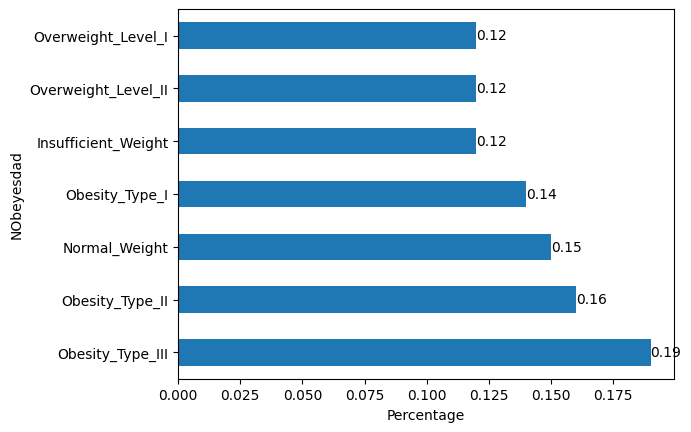

In [11]:
ax = round(competition_train['NObeyesdad'].value_counts(normalize = True), 2).plot(kind = 'barh')
ax.bar_label(ax.containers[0], label_type = 'edge')
ax.margins(y = 0.1)
plt.xlabel('Percentage');

# `NObeyesdad` has seven labels.
# `NObeyesdad` is a lite imbalanced; however, it is not that extreme.

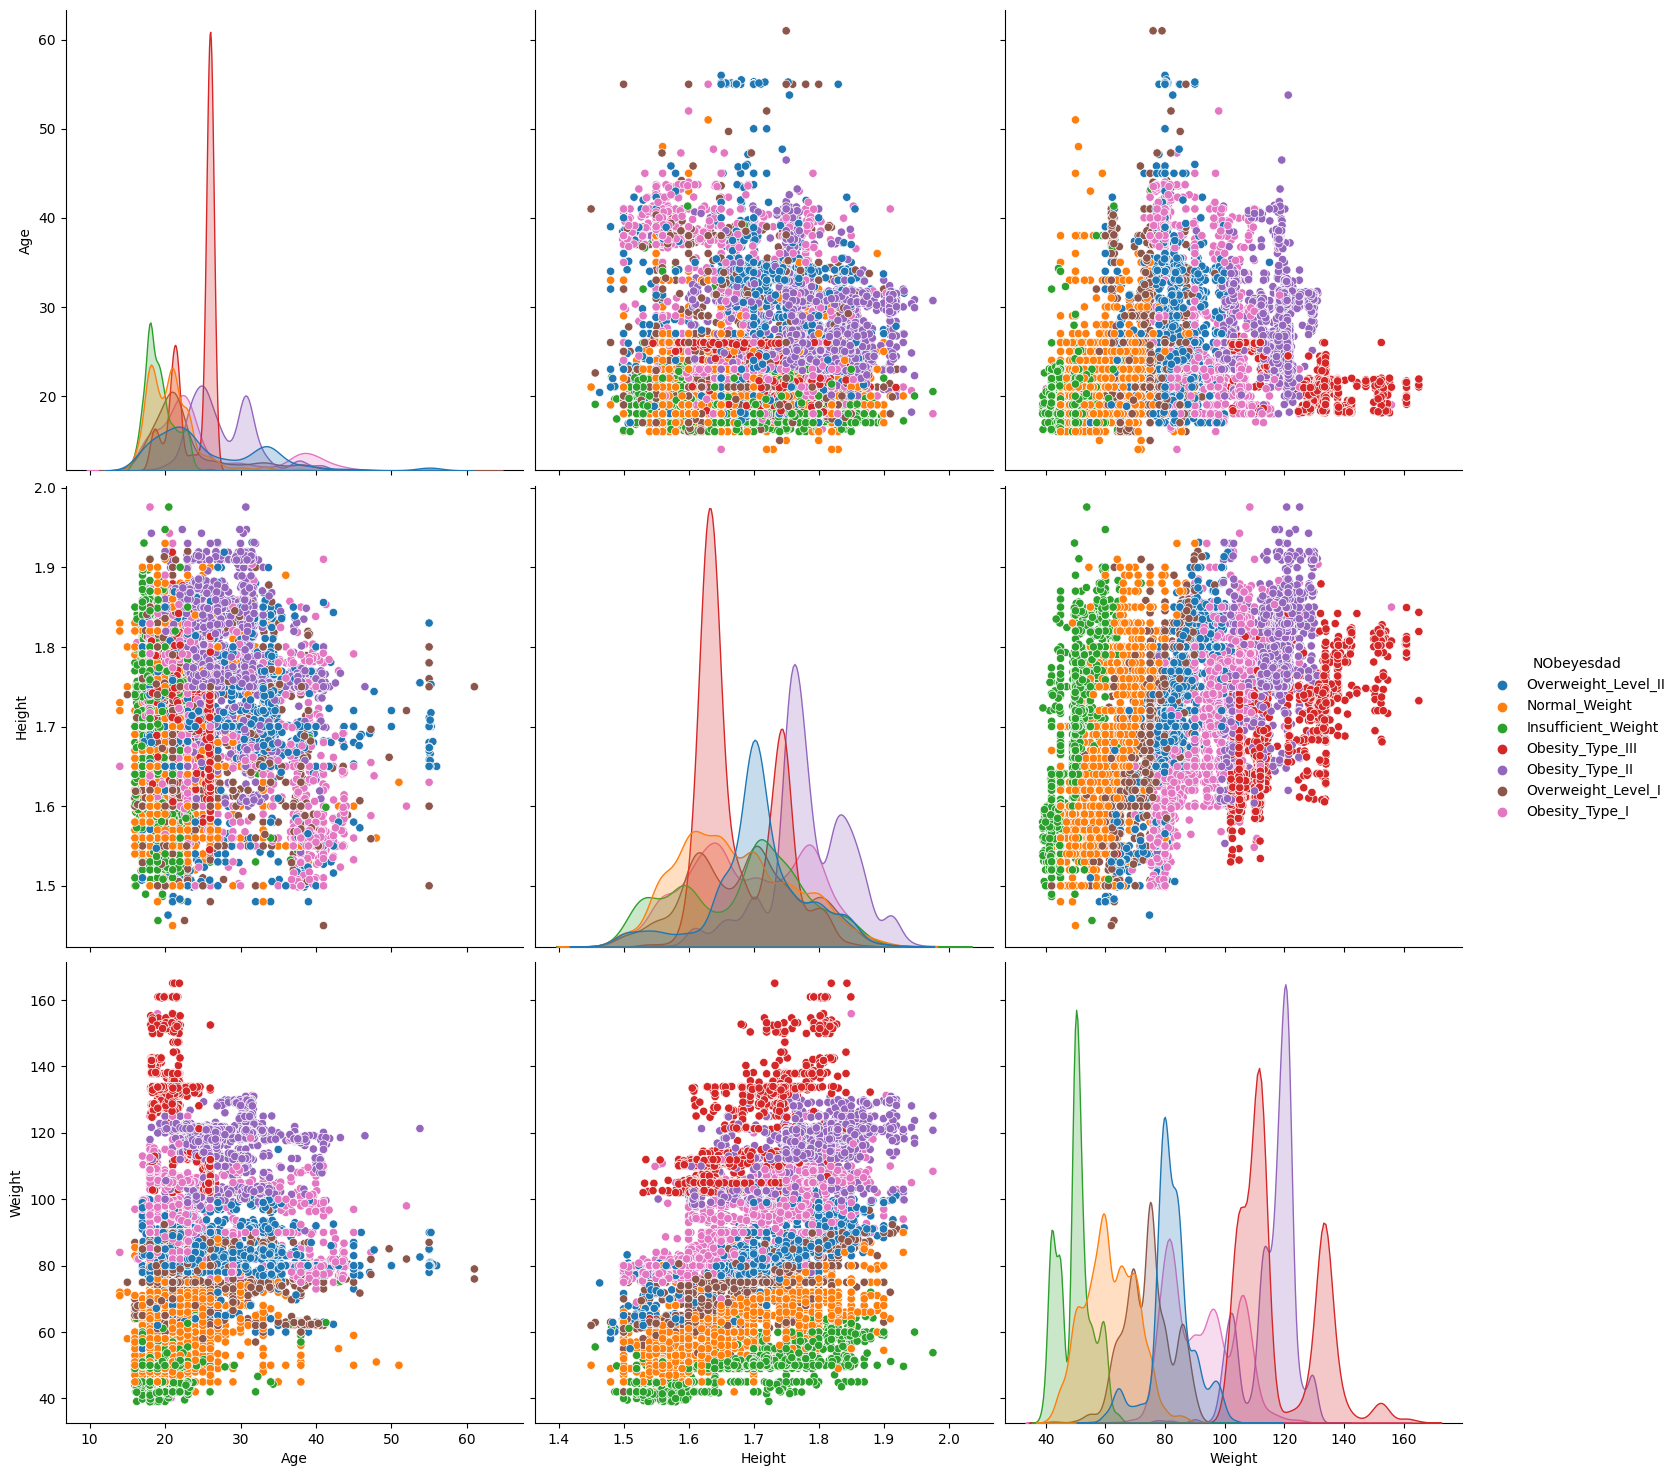

In [12]:
sns.pairplot(data = competition_train[['Age', 'Height', 'Weight', 'NObeyesdad']], hue = 'NObeyesdad', height = 5);
#seven separable groups in the `Height` and `Weight` scatter-plot.

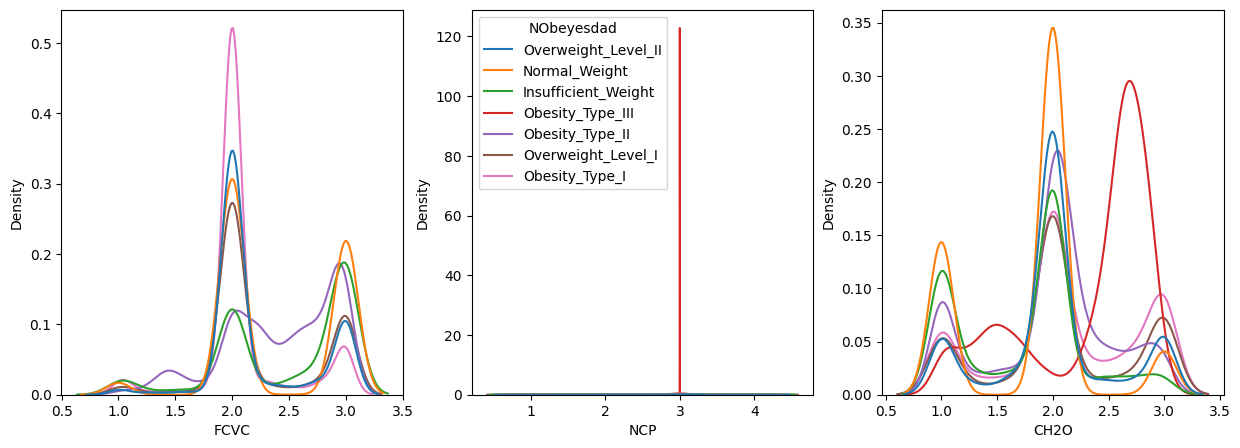

In [13]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

sns.kdeplot(ax = axes[0], data = competition_train, x = 'FCVC', hue = 'NObeyesdad', legend = False)
sns.kdeplot(ax = axes[1], data = competition_train, x = 'NCP', hue = 'NObeyesdad')
sns.kdeplot(ax = axes[2], data = competition_train, x = 'CH2O', hue = 'NObeyesdad', legend = False);

# The distrubtion of the seven labels of `NObeyesdad` are very simliar in the `FCVC` feature.
# The distrubtion of the six labels of `NObeyesdad` are very simliar in the `CH2O` feature.

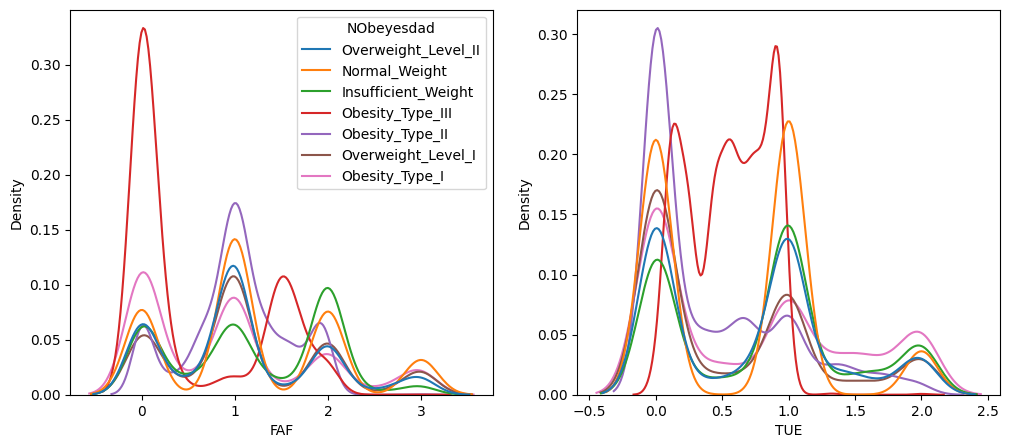

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.kdeplot(ax = axes[0], data = competition_train, x = 'FAF', hue = 'NObeyesdad', legend = True)
sns.kdeplot(ax = axes[1], data = competition_train, x = 'TUE', hue = 'NObeyesdad', legend = False);

#From the above & below charts, we see that the distribution of six labels of `NObeyesdad` are very similar except by `Obesity_Type_III`. 
#Next, we explore potential relationships between the categorical features and `NObeyesdad`.

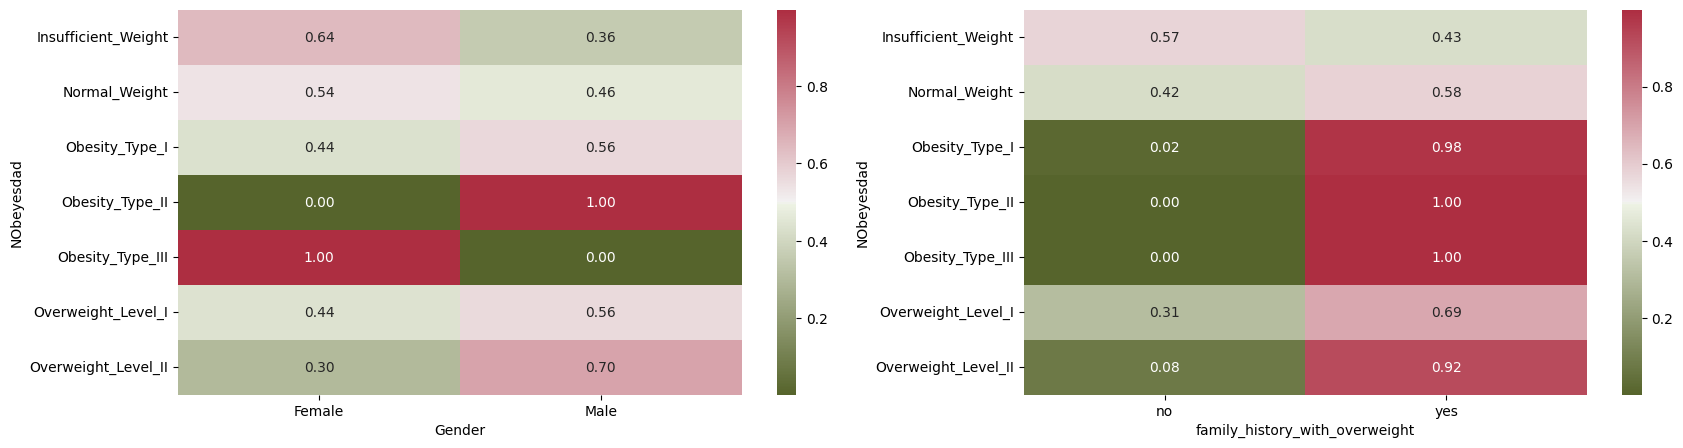

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (20, 5))

cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 5, center = 'light', as_cmap = True)

sns.heatmap(ax = axes[0], data = pd.crosstab(competition_train['NObeyesdad'], competition_train['Gender'], normalize = 'index'), annot = True, cmap = cmap, fmt = '.2f');
sns.heatmap(ax = axes[1], data = pd.crosstab(competition_train['NObeyesdad'], competition_train['family_history_with_overweight'], normalize = 'index'), annot = True, cmap = cmap, fmt = '.2f');

## Feature Engineering

In [16]:
import copy

train_df = copy.deepcopy(competition_train)
test_df = copy.deepcopy(competition_test)

In [17]:
def feature_data(df):
    df['BMI'] = df['Weight'] / np.square(df['Height'])
    return df

In [18]:
#Genrating New Features
train_df = feature_data(train_df)
test_data = feature_data(test_df)

print((train_df.shape, test_df.shape))

((20758, 19), (13840, 18))


In [19]:
train_df[['Gender','Height','Weight','BMI','NObeyesdad']]

,Gender,Height,Weight,BMI,NObeyesdad
0,Male,1.699998,81.669950,28.259565,Overweight_Level_II
1,Female,1.560000,57.000000,23.422091,Normal_Weight
2,Female,1.711460,50.165754,17.126706,Insufficient_Weight
3,Female,1.710730,131.274851,44.855798,Obesity_Type_III
4,Male,1.914186,93.798055,25.599151,Overweight_Level_II
...,...,...,...,...,...
20753,Male,1.766626,114.187096,36.587084,Obesity_Type_II
20754,Male,1.710000,50.000000,17.099278,Insufficient_Weight
20755,Male,1.819557,105.580491,31.889841,Obesity_Type_II
20756,Male,1.700000,83.520113,28.899693,Overweight_Level_II


# Preprocessing

In [20]:
# drop ID
train_df.drop(['id'],axis=1,inplace=True)
train_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


In [21]:
test_df.drop(['id'],axis=1,inplace=True)
test_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation,35.315411
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,25.781250
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation,41.324115
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation,42.976937
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation,39.584143


In [22]:
print((train_df.shape, test_df.shape))

((20758, 18), (13840, 17))


In [23]:
numerical_cols = test_df.select_dtypes(include=['int', 'float']).columns.tolist()
print(f'Number of numeric columns:  {len(numerical_cols)}')
print(numerical_cols)

Number of numeric columns:  9
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']


In [24]:
categorical_cols = test_df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f'Number of numeric columns:  {len(categorical_cols)}')
print(categorical_cols)

Number of numeric columns:  8
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [25]:
my_cols = categorical_cols + numerical_cols

X = train_df[my_cols].copy()
y = train_df.NObeyesdad

final_test_df = test_df[my_cols].copy()

In [26]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [27]:
# Get 80% of the dataset as the training set. Put the remaining 20% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(X, y, test_size=0.20, random_state=1)

# Split the 20% subset above into two: one half for cross validation and the other for the test set
x_valid, x_test, y_valid, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_valid.shape}")
print(f"the shape of the cross validation set (target) is: {y_valid.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (16606, 17)
the shape of the training set (target) is: (16606,)

the shape of the cross validation set (input) is: (2076, 17)
the shape of the cross validation set (target) is: (2076,)

the shape of the test set (input) is: (2076, 17)
the shape of the test set (target) is: (2076,)


## Preprocessing Pipeline

In [28]:
numerical_transformer = Pipeline(steps=[
    ('scalar', MinMaxScaler()),
    ('MeanImputer', SimpleImputer())
    ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [29]:
new_X_train = pd.DataFrame(preprocessor.fit_transform(x_train))
new_X_valid = pd.DataFrame(preprocessor.transform(x_valid))
new_X_test = pd.DataFrame(preprocessor.transform(x_test))

new_final_test_df = pd.DataFrame(preprocessor.transform(final_test_df))

print(new_X_train.shape)
print(new_X_valid.shape)
print(new_X_test.shape)
print(new_final_test_df.shape)

(16606, 31)
(2076, 31)
(2076, 31)
(13840, 31)


# Modeling

### Define multiple models

In [30]:
# Define multiple models
models = [
    ('DecisionTree', DecisionTreeClassifier(random_state=42)),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('LGBMClassifier', LGBMClassifier(random_state=42, verbose=-1)),
    ('XGBClassifier', XGBClassifier(random_state=42)),
    ('CatBoostClassifier', CatBoostClassifier(random_state=42, verbose=False))
]

In [31]:
# Create a DataFrame to store predictions, accuracy and a list of trained models
predictions_df = pd.DataFrame()
accuracy_df = pd.DataFrame(columns=['Model', 'Validation_Accuracy', 'Test_Accuracy'])
trained_models = []

In [32]:
# Iterate over models
for model_name, model in models:
    # Fit the model on the training data
    model.fit(new_X_train,y_train)
    
    trained_models.append(model)

    # Make predictions on the validation data
    val_predictions = model.predict(new_X_valid)
    val_accuracy = accuracy_score(y_valid, val_predictions)
    print(f"{model_name} \nValidation Accuracy: {val_accuracy:.3f}")
    
    # for this baseic version, test accuracy is without any tuning
    test_predictions = model.predict(new_X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f'Test Accuracy: {test_accuracy:.3f}')
    
    # Store accuracy scores in the accuracy_df
    accuracy_df = pd.concat([accuracy_df, pd.DataFrame([[model_name, val_accuracy, test_accuracy]], columns=['Model', 'Validation_Accuracy', 'Test_Accuracy'])])
    

DecisionTree 
Validation Accuracy: 0.848
Test Accuracy: 0.834
RandomForest 
Validation Accuracy: 0.899
Test Accuracy: 0.897
LGBMClassifier 
Validation Accuracy: 0.904
Test Accuracy: 0.902
XGBClassifier 
Validation Accuracy: 0.903
Test Accuracy: 0.903
CatBoostClassifier 
Validation Accuracy: 0.906
Test Accuracy: 0.903


In [33]:
# Display the DataFrame with accuracy scores
print(accuracy_df)

                Model  Validation_Accuracy  Test_Accuracy
0        DecisionTree             0.848266       0.834297
0        RandomForest             0.898844       0.897399
0      LGBMClassifier             0.903661       0.902216
0       XGBClassifier             0.902697       0.903179
0  CatBoostClassifier             0.905588       0.903179


In [34]:
best_model = trained_models[4]
best_model

# Prediction

In [35]:
predictions = best_model.predict(new_final_test_df)
predictions

array([[3],
       [5],
       [4],
       ...,
       [0],
       [1],
       [3]])

In [36]:
predictions = label_encoder.inverse_transform(predictions)
predictions

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [37]:
output = pd.DataFrame({
    "id": competition_test["id"].to_list(),
    "NObeyesdad": predictions
})

output

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [38]:
output.to_csv('submission.csv', index=False)